# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocess the Raw Data

In [2]:
rawData = pd.read_csv('2nd_Hand_Car_Price_Prediction.csv')
rawData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Variables of Interest

In [4]:
rawData = rawData.drop(['Model'], axis=1)

### Missing Values

In [5]:
rawData.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
rawData = rawData.dropna(axis=0)
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Checking for Outliers

##### Price PDF

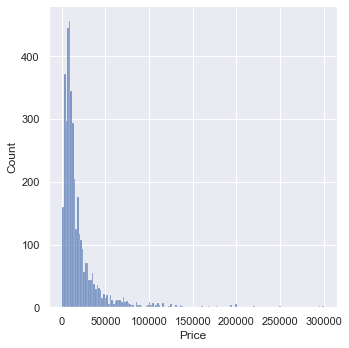

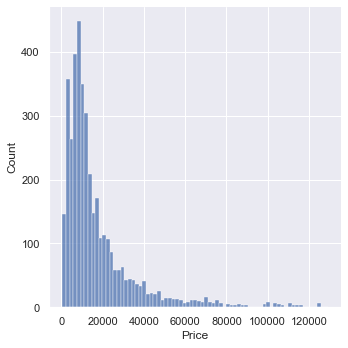

In [7]:
sns.displot(rawData['Price'])
price_quantile = rawData['Price'].quantile(0.99)
data_price = rawData[rawData['Price'] < price_quantile]
sns.displot(data_price['Price'])

##### Mileage PDF

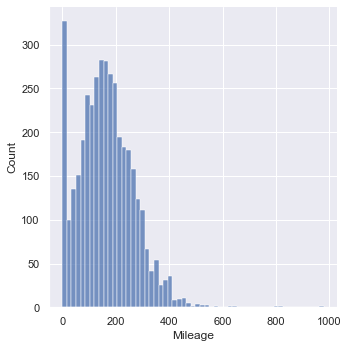

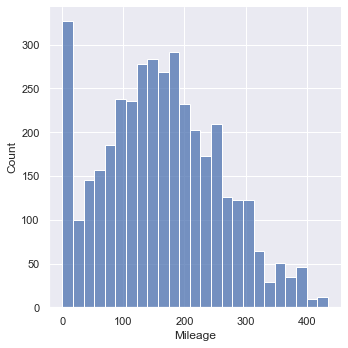

In [8]:
sns.displot(data_price['Mileage'])
mileage_quantile = data_price['Mileage'].quantile(0.99)
data_mileage = data_price[data_price['Mileage'] < mileage_quantile]
sns.displot(data_mileage['Mileage'])

##### EngineV PDF

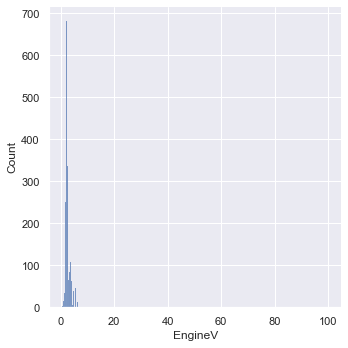

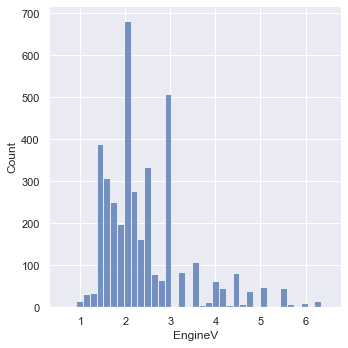

In [9]:
sns.displot(data_mileage['EngineV'])
data_engineV = data_mileage[data_mileage['EngineV'] <= 6.5]
sns.displot(data_engineV['EngineV'])

##### Year PDF

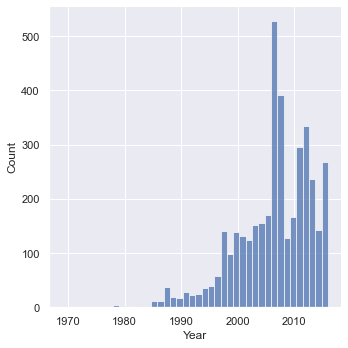

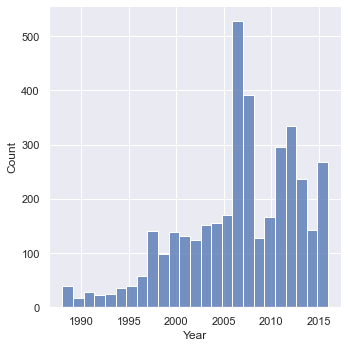

In [10]:
sns.displot(data_engineV['Year'])
year_quantile = data_engineV['Year'].quantile(0.01)
data_year = data_engineV[data_engineV['Year'] > year_quantile]
sns.displot(data_year['Year'])

In [11]:
data_cleaned = data_year.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [12]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### OLS Assumptions

In [13]:
import plotly.express as px

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [14]:
y = data_cleaned['Price']

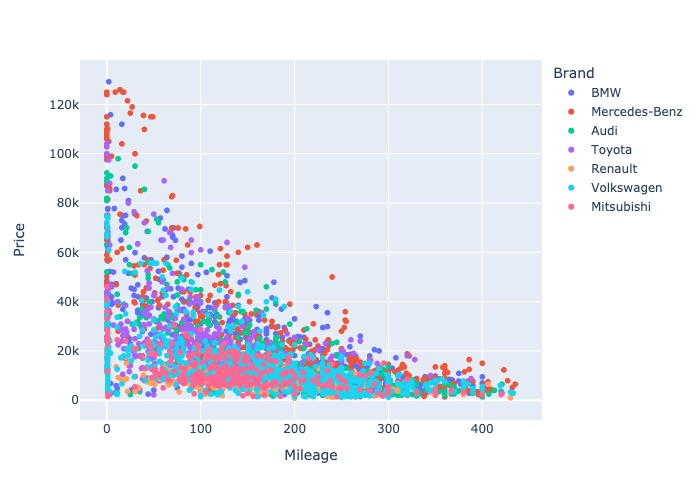

In [15]:
fig = px.scatter(data_frame=data_cleaned, x='Mileage', y='Price', color='Brand')
fig.show(renderer='jpg')

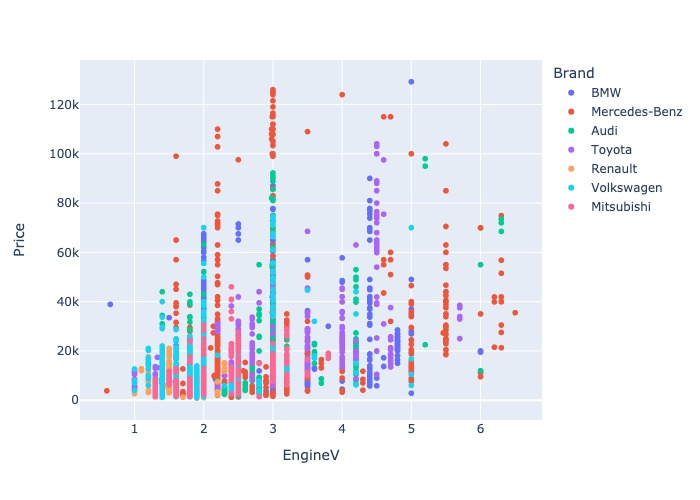

In [16]:
fig = px.scatter(data_frame=data_cleaned, x='EngineV', y='Price', color='Brand')
fig.show(renderer='jpg')

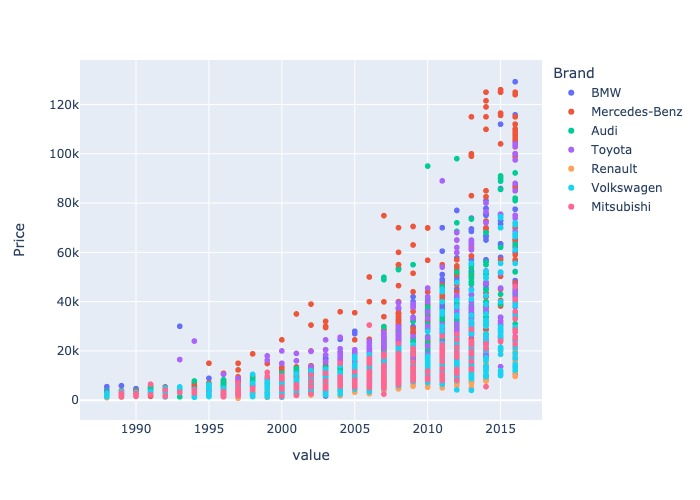

In [17]:
fig = px.scatter(data_frame=data_cleaned, x=['Year'], y='Price', color='Brand')
fig.show(renderer='jpg')

### Relax OLS Assumptions

In [18]:
y_relax = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = y_relax
data_cleaned = data_cleaned.drop(['Price'], axis=1)

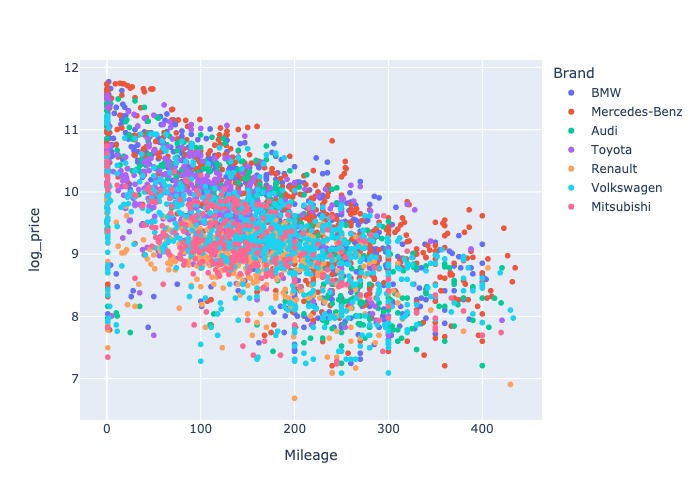

In [19]:
fig = px.scatter(data_frame=data_cleaned, x='Mileage', y='log_price', color='Brand')
fig.show(renderer='jpg')

In [ ]:
fig = px.scatter(data_frame=data_cleaned, x=['EngineV'], y='log_price', color='Brand')
fig.show(renderer='jpg')

In [ ]:
fig = px.scatter(data_frame=data_cleaned, x=['Year'], y='log_price', color='Brand')
fig.show(renderer='jpg')

### Multi-Collinearity Check (Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
VIF = pd.DataFrame(data=['Mileage', 'EngineV', 'Year'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV', 'Year']]
VIF['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF

##### As Year has a high VIF, we'll drop it

In [ ]:
data_cleaned = data_cleaned.drop(['Year'], axis=1)
VIF_dropped = pd.DataFrame(data=['Mileage', 'EngineV'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV']]
VIF_dropped['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF_dropped

### Rearranging the data

In [ ]:
data_cleaned.columns.values

In [ ]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand', 'Body', 'Engine Type', 'Registration']

data_cleaned = data_cleaned[cols]
data_cleaned.head()

### Dummy Categorical

In [ ]:
data_dummy = pd.get_dummies(data_cleaned, drop_first=True)
data_dummy.head()

In [ ]:
data_preprocessed = data_dummy.copy()
data_preprocessed.head()

In [ ]:
data_preprocessed.describe(include='all')

# Linear Regression Model

### Declare Targets (y) and Inputs (x)

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Standardize Inputs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()
Scaler.fit(inputs)
inputs_scaled = Scaler.transform(inputs)
inputs_scaled

# Train Test Spilt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.4, random_state=42)

### Create the Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
%time
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

##### R-Score and Adjusted R-Score

In [ ]:
R2 = regression.score(x_train, y_train)
R2

In [ ]:
def Adjusted_R2(independent_variable, dependent_variable):
    R2 = regression.score(independent_variable, dependent_variable)
    n = independent_variable.shape[0]
    p = independent_variable.shape[1]
    
    adjustedR2 = 1 - (1-R2) * ((n-1) / (n-p-1))
    return adjustedR2

In [ ]:
Adjusted_R2(independent_variable=x_train, dependent_variable=y_train)

### Weights and Bias

In [ ]:
weights = regression.coef_
bias = regression.intercept_
print('Weights are: {} \nBias is: {}'.format(weights, bias))

### Features Selection

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_Stats = f_regression(x_train, y_train)[0].round(3)
p_values = f_regression(x_train, y_train)[1].round(3)

### Summary Table

In [ ]:
summary_table = pd.DataFrame(data=inputs.columns.values,
                            columns=['features'])
summary_table['Weights'] = weights
summary_table['f_Stats'] = f_Stats
summary_table['p_values'] = p_values

summary_table

### Plot and Compare Targets and its Prediction

In [ ]:
y_hat = regression.predict(x_train)

In [ ]:
fig = px.scatter(x=y_train, y=y_hat, labels={'x': 'y_train',
                                             'y': 'y_hat'})
fig.show(renderer='jpg')

### Plot and Compare the residuals

In [ ]:
residual = y_train - y_hat
sns.displot(residual)

### MAPE (Training Set)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
train_MAPE = MAPE(y_true=y_train, y_pred=y_hat)
np.absolute((train_MAPE * 100).round(3))

# Testing the Data

### Reset the index

In [ ]:
y_test = y_test.reset_index(drop=True)

### Predicting the inputs test set

In [ ]:
y_hat_test = regression.predict(x_test)

### Plot and Compare targets and its prediction

In [ ]:
fig = px.scatter(x=y_test, y=y_hat_test, labels={'x': 'y_test',
                                                 'y': 'y_hat_test'})
fig.show(renderer='jpg')

### Plot and Compare using Residuals

In [ ]:
residual_test = np.exp(y_test) - np.exp(y_hat_test)
sns.displot(residual_test)

### Prediction's Dataset Performance

In [ ]:
prediction = pd.DataFrame(data=np.exp(y_hat_test),
                         columns=['y_hat_test (Prediction)'])
prediction['y_test (targets)'] = np.exp(y_test)
prediction['Residual'] = residual_test
prediction['Residual Percentage'] = np.absolute(prediction['Residual'] / prediction['y_test (targets)'] * 100).round(3)
prediction

In [ ]:
prediction.describe(include='all')

In [ ]:
regression.score(x_test, y_test)

In [ ]:
Adjusted_R2(independent_variable=x_test, dependent_variable=y_test)

### MAPE (Testing Set)

In [ ]:
test_MAPE = MAPE(y_true=y_test, y_pred=y_hat_test)
np.absolute((test_MAPE * 100).round(3))